### Importación de libreríás

In [500]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

### Carga del conjunto de datos

El conjunto de datos contiene un total de 5820 calificaciones de evaluación proporcionadas por estudiantes de la Universidad de Gazi en Ankara (Turquía). Hay un total de 28 preguntas específicas del curso y 5 atributos adicionales.

In [501]:
df = pd.read_csv('turkiye-student-evaluation_generic.csv')
df.head()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,1,2,1,0,4,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,1,2,1,2,4,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
3,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
4,1,2,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


### Descripción de las variables

Las variables desde Q1 hasta Q12 evalúan aspectos relacionados al contenido de la clase, mientras que las variables desde Q13 hasta Q28 evalúan aspectos relacionados al desempeño del instructor en los cursos evaluados.

### Información de filas y columnas y de sus tipos de datos

Verificamos el número de instancias descrito (5820), todas las variables son de tipo entero y no existen datos ausentes

In [502]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5820 entries, 0 to 5819
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   instr       5820 non-null   int64
 1   class       5820 non-null   int64
 2   nb.repeat   5820 non-null   int64
 3   attendance  5820 non-null   int64
 4   difficulty  5820 non-null   int64
 5   Q1          5820 non-null   int64
 6   Q2          5820 non-null   int64
 7   Q3          5820 non-null   int64
 8   Q4          5820 non-null   int64
 9   Q5          5820 non-null   int64
 10  Q6          5820 non-null   int64
 11  Q7          5820 non-null   int64
 12  Q8          5820 non-null   int64
 13  Q9          5820 non-null   int64
 14  Q10         5820 non-null   int64
 15  Q11         5820 non-null   int64
 16  Q12         5820 non-null   int64
 17  Q13         5820 non-null   int64
 18  Q14         5820 non-null   int64
 19  Q15         5820 non-null   int64
 20  Q16         5820 non-null   in

Tenemos un conjunto de 28 preguntas que tienen como objetivo la evaluación del instructor y la clase, las cuales son las 2 primeras columnas, seguido de 3 variables relacionadas con las métricas del alumno.

### Correlación entre las variables

In [503]:
df.corr()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
instr,1.000000,-0.039871,0.112763,-0.107231,-0.058368,-0.128931,-0.127070,-0.108949,-0.113222,-0.135606,...,-0.112485,-0.086831,-0.078101,-0.080586,-0.118889,-0.128880,-0.083563,-0.103499,-0.107664,-0.081672
class,-0.039871,1.000000,0.091527,-0.016312,-0.044899,-0.029542,-0.033274,-0.021534,-0.030165,-0.036584,...,-0.018727,-0.031234,-0.022758,-0.016553,-0.025983,-0.036712,-0.027816,-0.029491,-0.022576,-0.037364
nb.repeat,0.112763,0.091527,1.000000,-0.078086,0.110493,-0.024708,-0.041707,-0.035704,-0.033613,-0.031770,...,-0.045568,-0.042624,-0.046262,-0.045464,-0.041233,-0.033618,-0.049918,-0.035518,-0.032457,-0.044900
attendance,-0.107231,-0.016312,-0.078086,1.000000,0.436792,0.105266,0.149258,0.178393,0.138108,0.149747,...,0.190694,0.195166,0.204802,0.207740,0.177814,0.163546,0.204435,0.172695,0.144687,0.200150
difficulty,-0.058368,-0.044899,0.110493,0.436792,1.000000,0.052120,0.065031,0.071457,0.062171,0.064181,...,0.080017,0.091051,0.095628,0.099543,0.075317,0.072609,0.099682,0.064456,0.059370,0.090876
Q1,-0.128931,-0.029542,-0.024708,0.105266,0.052120,1.000000,0.866138,0.767381,0.849773,0.804757,...,0.699370,0.685299,0.673770,0.670702,0.728770,0.732167,0.672120,0.698924,0.709639,0.658873
Q2,-0.127070,-0.033274,-0.041707,0.149258,0.065031,0.866138,1.000000,0.850766,0.873556,0.861803,...,0.788643,0.778299,0.764986,0.766872,0.801172,0.797314,0.766622,0.778405,0.768125,0.752515
Q3,-0.108949,-0.021534,-0.035704,0.178393,0.071457,0.767381,0.850766,1.000000,0.826342,0.843329,...,0.799645,0.795384,0.791391,0.789747,0.799752,0.792241,0.793341,0.796296,0.765633,0.781299
Q4,-0.113222,-0.030165,-0.033613,0.138108,0.062171,0.849773,0.873556,0.826342,1.000000,0.867861,...,0.769526,0.759810,0.752171,0.748081,0.788852,0.789508,0.752370,0.766368,0.759536,0.742186
Q5,-0.135606,-0.036584,-0.031770,0.149747,0.064181,0.804757,0.861803,0.843329,0.867861,1.000000,...,0.809381,0.794833,0.780245,0.778777,0.831221,0.830279,0.782437,0.804916,0.791877,0.767411


<Axes: >

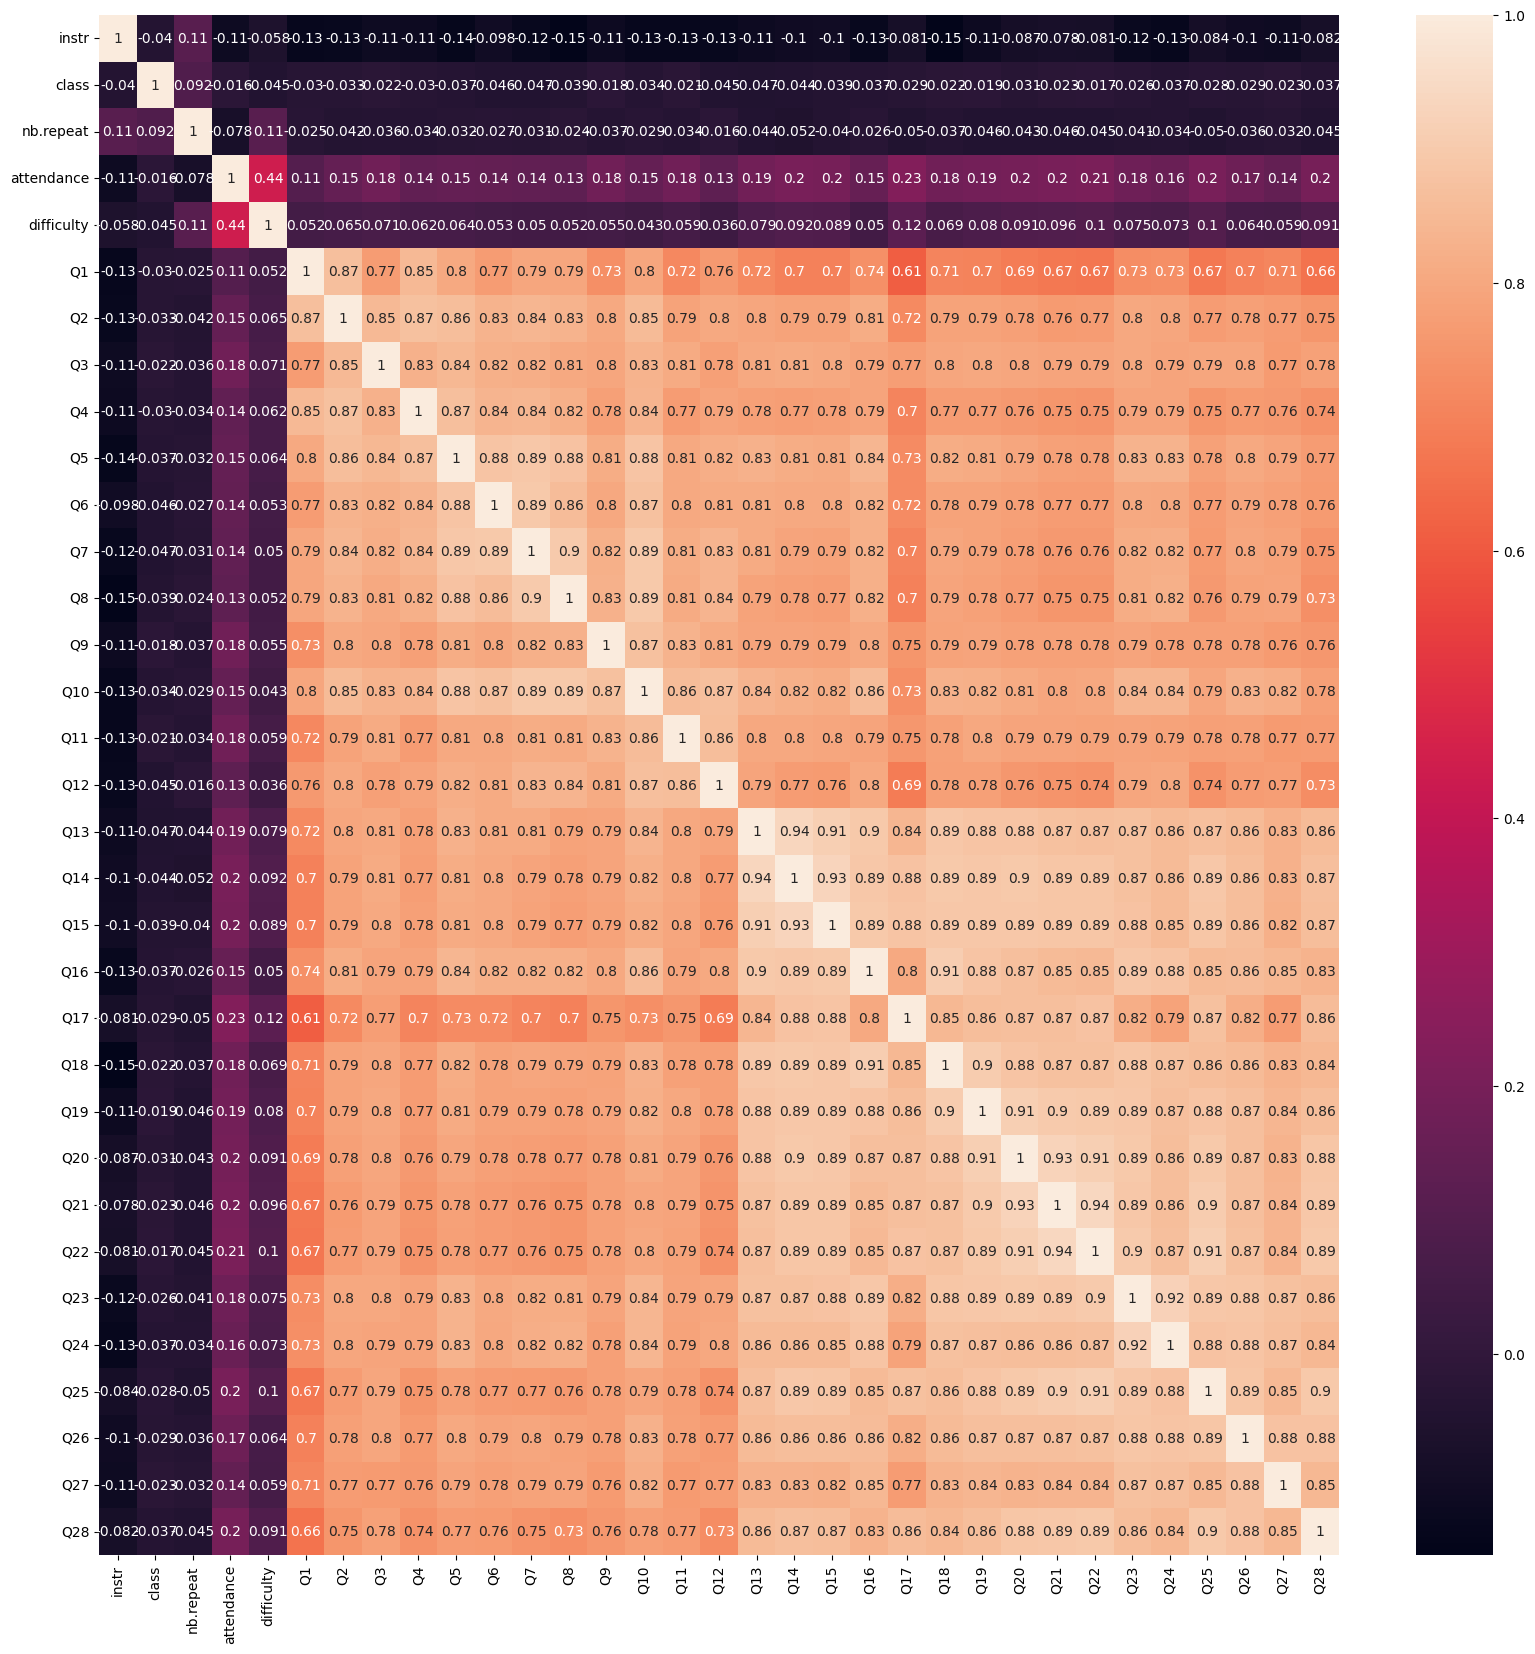

In [504]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True)

### Visualización de los datos

Graficamos las distribuciones de las 5 primeras columnas

<Axes: xlabel='difficulty', ylabel='count'>

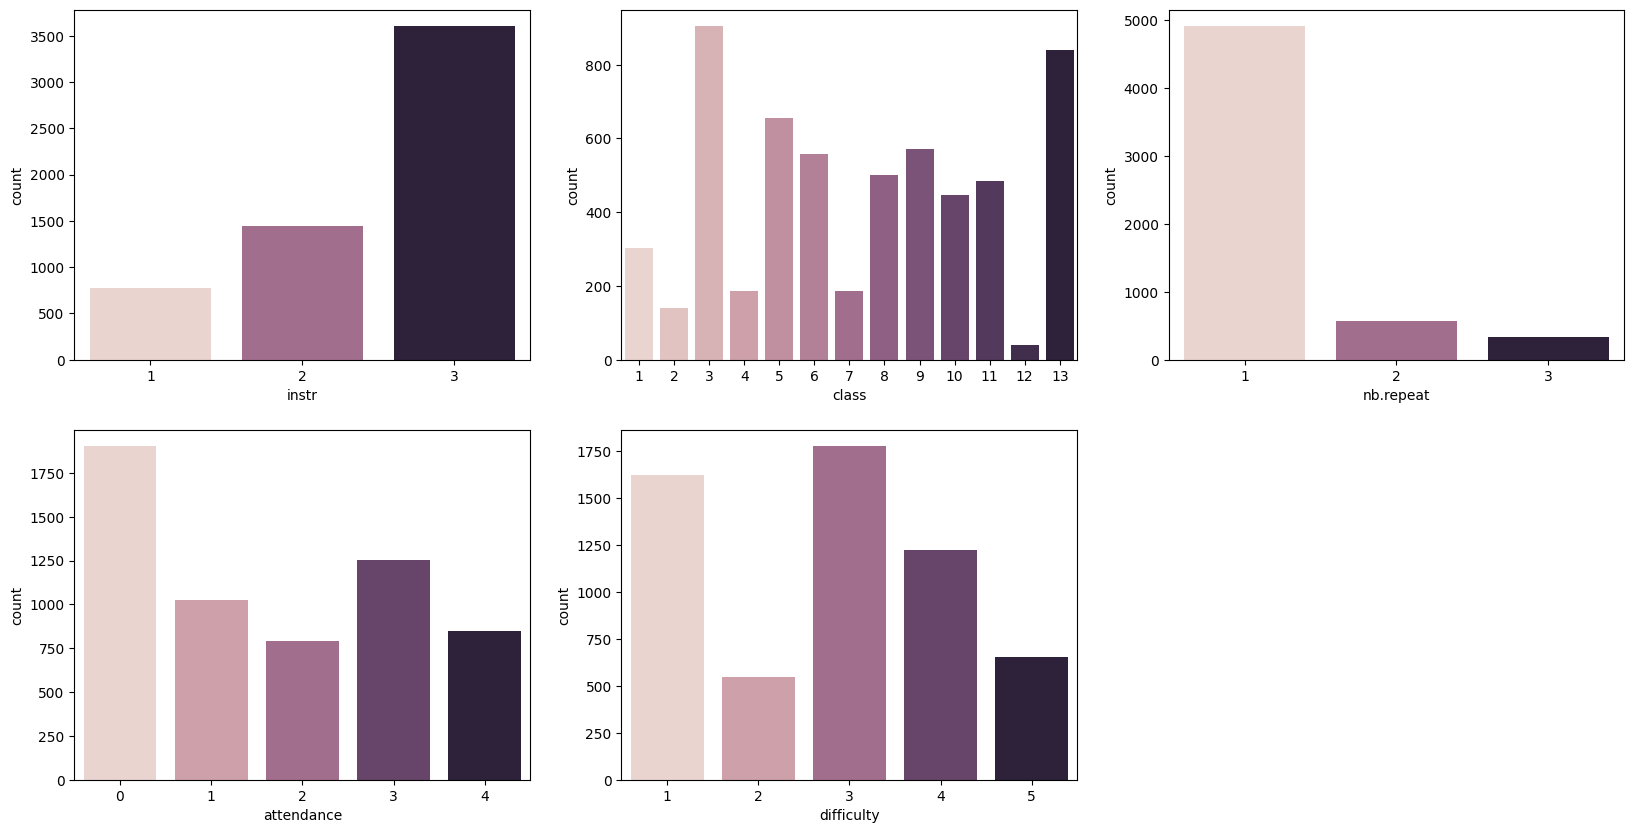

In [505]:
fig = plt.figure(figsize=(20, 10))
fig.add_subplot(2, 3, 1)
sns.countplot(x=df['instr'], hue=df['instr'], legend=False)
fig.add_subplot(2, 3, 2)
sns.countplot(x=df['class'], hue=df['class'], legend=False)
fig.add_subplot(2, 3, 3)
sns.countplot(x=df['nb.repeat'], hue=df['nb.repeat'], legend=False)
fig.add_subplot(2, 3, 4)
sns.countplot(x=df['attendance'], hue=df['attendance'], legend=False)
fig.add_subplot(2, 3, 5)
sns.countplot(x=df['difficulty'], hue=df['difficulty'], legend=False)

Se observan varios registros con un valor de 0 en la columna de asistencia, lo que plantea la cuestión de si es apropiado considerar la evaluación de una persona que no asistió a clases. Dado que no estuvo presente, no tendría criterios válidos para evaluar ni el contenido del curso ni el desempeño del profesor.

In [506]:
df['attendance'].value_counts()[0]

np.int64(1902)

Hay una cantidad considerable de registros con una asistencia de 0, representando aproximadamente el 32.7% del total de la base de datos original.

In [507]:
for column in df.columns:
    unique_values = df[column].unique()
    unique_values.sort()
    print(f"Valores únicos para variable: {column}: {unique_values}")

Valores únicos para variable: instr: [1 2 3]
Valores únicos para variable: class: [ 1  2  3  4  5  6  7  8  9 10 11 12 13]
Valores únicos para variable: nb.repeat: [1 2 3]
Valores únicos para variable: attendance: [0 1 2 3 4]
Valores únicos para variable: difficulty: [1 2 3 4 5]
Valores únicos para variable: Q1: [1 2 3 4 5]
Valores únicos para variable: Q2: [1 2 3 4 5]
Valores únicos para variable: Q3: [1 2 3 4 5]
Valores únicos para variable: Q4: [1 2 3 4 5]
Valores únicos para variable: Q5: [1 2 3 4 5]
Valores únicos para variable: Q6: [1 2 3 4 5]
Valores únicos para variable: Q7: [1 2 3 4 5]
Valores únicos para variable: Q8: [1 2 3 4 5]
Valores únicos para variable: Q9: [1 2 3 4 5]
Valores únicos para variable: Q10: [1 2 3 4 5]
Valores únicos para variable: Q11: [1 2 3 4 5]
Valores únicos para variable: Q12: [1 2 3 4 5]
Valores únicos para variable: Q13: [1 2 3 4 5]
Valores únicos para variable: Q14: [1 2 3 4 5]
Valores únicos para variable: Q15: [1 2 3 4 5]
Valores únicos para vari

Verificamos tanto de forma gráfico como descriptiva que los datos no poseen datos atípicos ni erróneos.

### Conclusiones del análisis descriptivo de los datos

- Las variables **instr** y **class** son variables categóricas nominales, donde cada número asignado representa una categoría distinta.
- La variable **nb.repeat** es numérica y refleja la cantidad de veces que un estudiante ha tomado la clase. Aunque en la descripción se menciona que puede tomar valores mayores o iguales a cero, en nuestro conjunto de datos solo presenta valores entre 1 y 3.
- Las variables **difficulty** y **Q1-Q28** son categóricas ordinales, con valores que van de 1 a 5. En el caso de **difficulty**, 1 representa "fácil" y 5 "difícil", mientras que en **Q1-Q28**, 1 indica "completamente en desacuerdo" y 5 "completamente de acuerdo".

### Preparación de los datos

Los datos con un valor de 0 en la columna de asistencia deben ser eliminados, ya que los estudiantes que no asistieron a clase no están en condiciones de evaluar ni el contenido del curso ni el desempeño del profesor de manera precisa. Mantener estas evaluaciones sesgaría los resultados, introduciendo opiniones que no reflejan una experiencia directa en el aula. Esto comprometería la validez del análisis, ya que se estarían considerando respuestas de personas que no cuentan con criterios suficientes para emitir una evaluación fundamentada. Eliminar estos registros mejora la calidad de los datos y garantiza una evaluación más confiable y precisa.

In [508]:
df_cleaned = df[df["attendance"] != 0]
df_cleaned.reset_index(drop=True, inplace=True)
print(f"Valores únicos de la variable attendance {df_cleaned['attendance'].unique()}")
print(f"Total de instancias despues del procesamiento: {len(df_cleaned)}")

Valores únicos de la variable attendance [1 2 3 4]
Total de instancias despues del procesamiento: 3918


Para simplificar el análisis, se crean dos nuevas variables que representan la media de las preguntas Q1-Q12 (calificación del curso) y Q13-Q28 (calificación al instructor). Esto permite resumir la percepción de los estudiantes en dos dimensiones clave: la calidad del curso y el desempeño del instructor.

In [509]:
df_cleaned.loc[:, "mean_class"] = df_cleaned.iloc[:, 5:17].mean(axis=1)
df_cleaned.loc[:, "mean_instr"] = df_cleaned.iloc[:, 17:33].mean(axis=1)
df_cleaned

/tmp/ipykernel_7839/3758411142.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.loc[:, "mean_class"] = df_cleaned.iloc[:, 5:17].mean(axis=1)
/tmp/ipykernel_7839/3758411142.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.loc[:, "mean_instr"] = df_cleaned.iloc[:, 17:33].mean(axis=1)


,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,mean_class,mean_instr
0,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3.000000,3.0000
1,1,2,1,2,4,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5.000000,5.0000
2,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3.000000,3.0000
3,1,2,1,3,3,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4.000000,4.0000
4,1,2,1,1,3,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4.000000,4.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3913,3,13,2,3,4,2,3,3,3,3,...,3,3,3,3,3,3,3,3,2.916667,3.0000
3914,3,13,1,2,4,1,1,1,1,1,...,1,2,1,1,1,1,1,1,1.000000,1.1875
3915,3,13,1,3,4,4,4,4,4,4,...,5,5,4,5,5,5,5,5,4.083333,4.9375
3916,3,13,1,1,2,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1.000000,1.0000


### Clustering

Las variables que se utilizarán en los modelos de aprendizaje no supervisado se enfocarán en aquellas preguntas que evalúan tanto el curso como el desempeño del profesor. Esta selección nos permitirá identificar clústers más significativos.

In [510]:
df_clustering = df_cleaned.iloc[:, 5:33].copy()
df_clustering

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
2,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
3,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
4,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3913,2,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
3914,1,1,1,1,1,1,1,1,1,1,...,2,1,1,2,1,1,1,1,1,1
3915,4,4,4,4,4,4,4,4,4,4,...,5,5,5,5,4,5,5,5,5,5
3916,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


### Obtención del número de clusters

Uso del criterio del codo. 

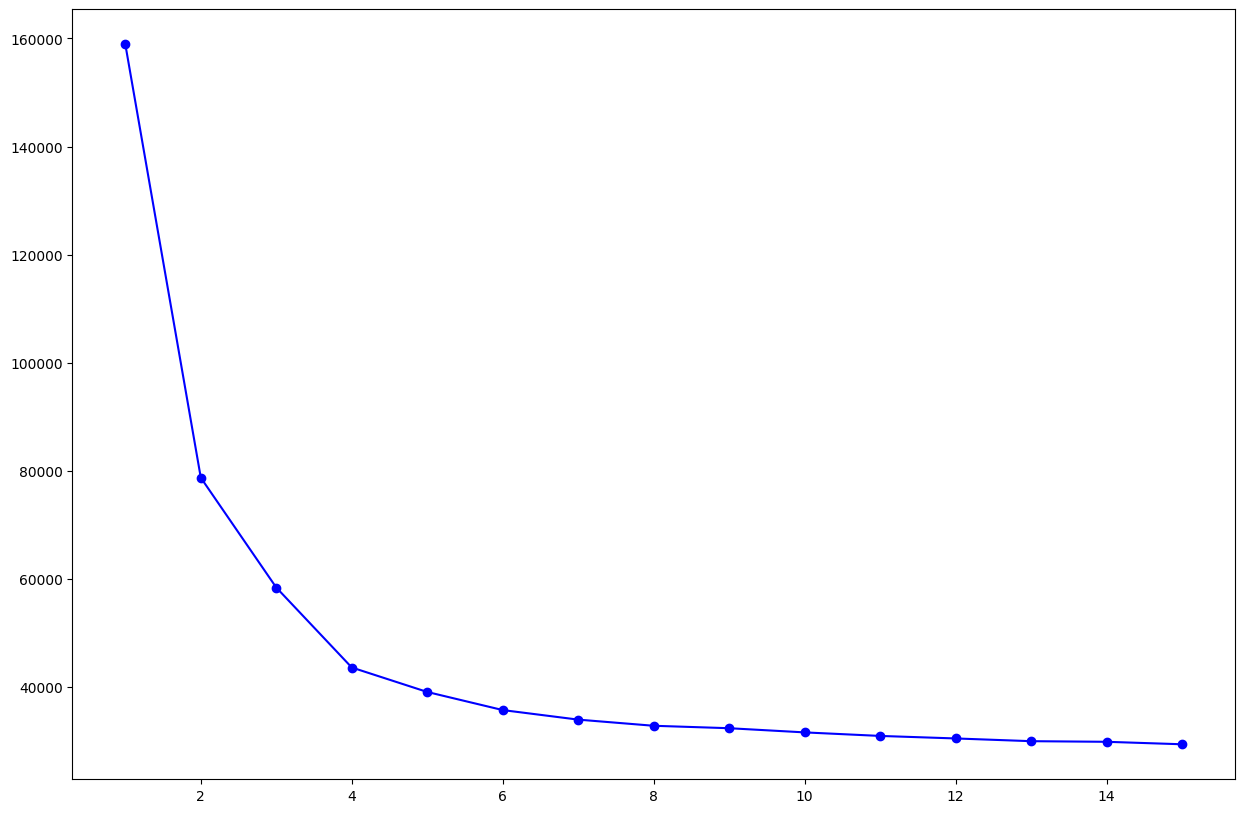

In [511]:
distances = []
p: list[KMeans] = []
n = 16

for i in range(1, n):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_clustering)
    distances.append(kmeans.inertia_)
    p.append(kmeans)
    
plt.figure(figsize=(15, 10))
plt.plot(np.array(range(1, n)), distances, "bo-")
plt.show()

### Silhouette Score

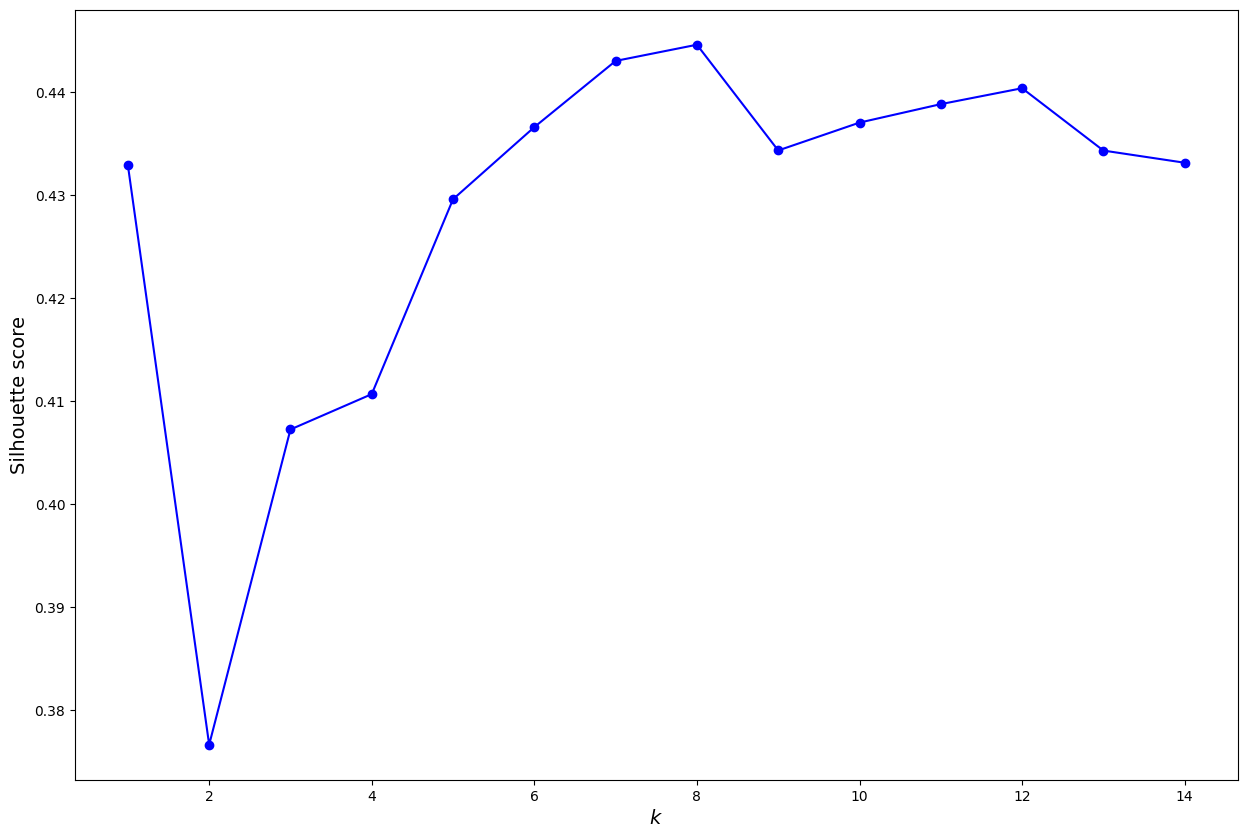

In [512]:
silhouette_scores = []
for model in p[1:]:
    s = silhouette_score(df_clustering, model.labels_)
    silhouette_scores.append(s)

plt.figure(figsize=(15, 10))
plt.plot(range(1, n-1), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)

plt.show()

Realizamos el análisis con el valor de 3 clusters

In [513]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(df_clustering)
df_clustering["cluster_kmeans"] = kmeans.predict(df_clustering)
df_clustering["cluster_kmeans"].value_counts()

cluster_kmeans
2    2428
1     783
0     707
Name: count, dtype: int64

### Visualización de Resultados

Aplicamos PCA para la visualización de clusters en 2 dimensiones

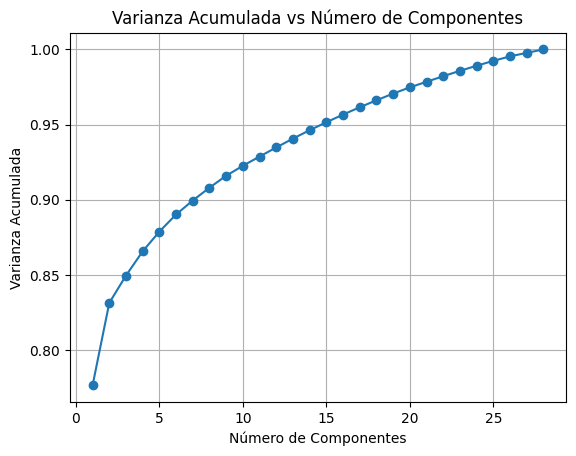

In [542]:
X = df_cleaned.iloc[:, 5:33]

pca = PCA()
pca.fit(X)

plt.figure()
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         pca.explained_variance_ratio_.cumsum(), marker='o')
plt.title('Varianza Acumulada vs Número de Componentes')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Acumulada')
plt.grid()
plt.show()


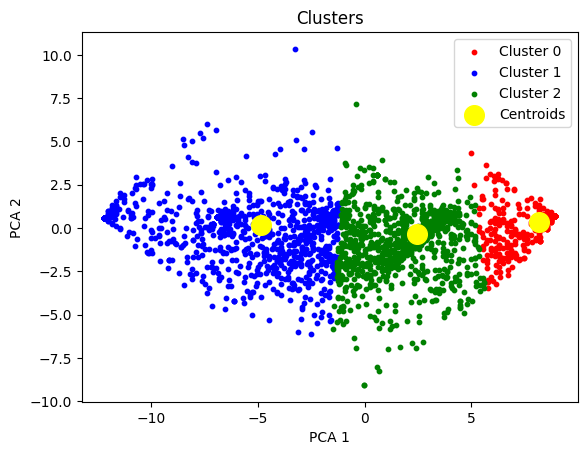

In [543]:
X = df_cleaned.iloc[:, 5:33]

pca = PCA(n_components=2)
X = pca.fit_transform(X)

kmeans_pca = KMeans(n_clusters=k, init = 'k-means++', random_state=42)
y_kmeans = kmeans_pca.fit_predict(X)

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=10, c="red", label="Cluster 0")
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=10, c="blue", label="Cluster 1")
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=10, c="green", label="Cluster 2")
plt.scatter(kmeans_pca.cluster_centers_[:, 0], kmeans_pca.cluster_centers_[:, 1], s=200, c="yellow", label="Centroids")
plt.title("Clusters")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.show()

### Analisis de Resultados

Verificamos la distribución de las variables en cada cluster con gráficos de caja.

IndexError: index 32 is out of bounds for axis 0 with size 32

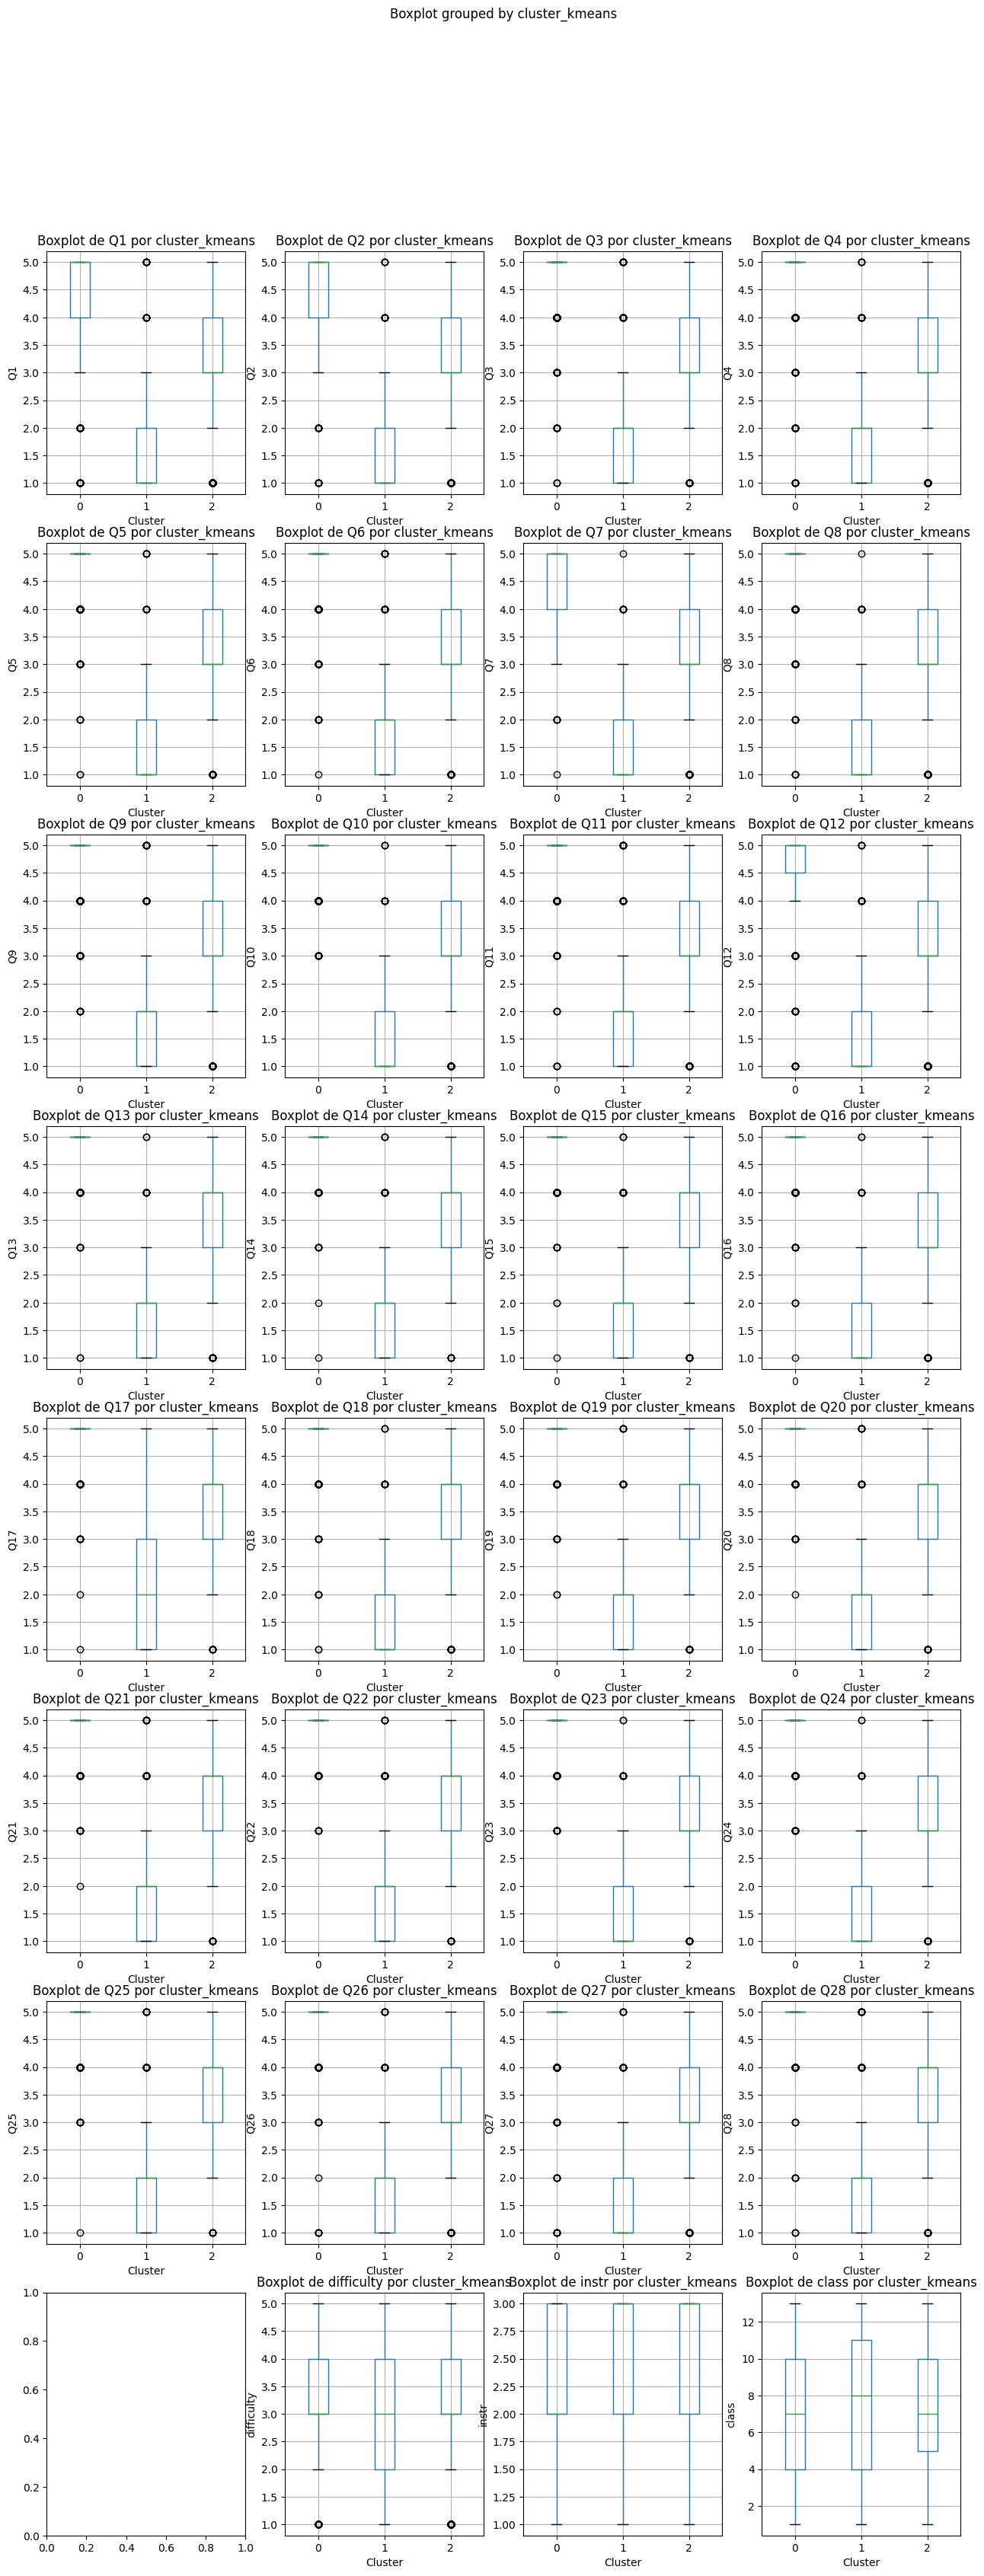

In [544]:
num_columns = 4
num_rows = (len(df_clustering.columns) - 1) // num_columns

# Crear una figura con subgráficas
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 5 * num_rows))
axes = axes.flatten()  # Aplanar el array de ejes para facilitar el acceso

# Generar boxplots para cada columna, agrupados por cluster_kmeans
for idx, column in enumerate(df_clustering.columns):
    if column != "cluster_kmeans":  # Asegurarse de no graficar la columna cluster_kmeans
        df_clustering.boxplot(column=column, by="cluster_kmeans", ax=axes[idx])
        axes[idx].set_title(f'Boxplot de {column} por cluster_kmeans')
        axes[idx].set_xlabel('Cluster')
        axes[idx].set_ylabel(column)

# Ajustar el diseño y eliminar el título automático
plt.suptitle('')
plt.tight_layout()
plt.savefig('boxplots_clusters.png')  # Guardar la figura como imagen
plt.show()  # Mostrar la figura

Se puede observar una tendencia clara en cada uno de los subgrupos respecto a las diversas variables analizadas. El **cluster 1** presenta los valores más bajos en las métricas utilizadas para evaluar tanto el curso como al instructor. En contraste, el **cluster 2** muestra valores que se sitúan principalmente alrededor del punto medio, es decir, un valor de 3. Finalmente, el **cluster 0** se distingue por tener los valores más altos en las métricas evaluadas, lo que sugiere una percepción más favorable en comparación con los otros clusters.

### Resultados y Discusión

A continuación, añadiremos las variables que describirán los clusters.

In [516]:
df_clustering["difficulty"] = df_cleaned["difficulty"]
df_clustering["instr"] = df_cleaned["instr"]
df_clustering["class"] = df_cleaned["class"]
df_clustering["nb.repeat"] = df_cleaned["nb.repeat"]
df_clustering["attendance"] = df_cleaned["attendance"]
df_clustering["mean_class"] = df_cleaned["mean_class"]
df_clustering["mean_instr"] = df_cleaned["mean_instr"]
df_clustering

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q27,Q28,cluster_kmeans,difficulty,instr,class,nb.repeat,attendance,mean_class,mean_instr
0,3,3,3,3,3,3,3,3,3,3,...,3,3,2,3,1,2,1,1,3.000000,3.0000
1,5,5,5,5,5,5,5,5,5,5,...,5,5,0,4,1,2,1,2,5.000000,5.0000
2,3,3,3,3,3,3,3,3,3,3,...,3,3,2,3,1,2,1,1,3.000000,3.0000
3,4,4,4,4,4,4,4,4,4,4,...,4,4,2,3,1,2,1,3,4.000000,4.0000
4,4,4,4,4,4,4,4,4,4,4,...,4,4,2,3,1,2,1,1,4.000000,4.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3913,2,3,3,3,3,3,3,3,3,3,...,3,3,2,4,3,13,2,3,2.916667,3.0000
3914,1,1,1,1,1,1,1,1,1,1,...,1,1,1,4,3,13,1,2,1.000000,1.1875
3915,4,4,4,4,4,4,4,4,4,4,...,5,5,0,4,3,13,1,3,4.083333,4.9375
3916,1,1,1,1,1,1,1,1,1,1,...,1,1,1,2,3,13,1,1,1.000000,1.0000


In [517]:
df_test = df_clustering.groupby('cluster_kmeans').mean()
df_test

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q26,Q27,Q28,difficulty,instr,class,nb.repeat,attendance,mean_class,mean_instr
cluster_kmeans,,,,,,,,,,,,,,,,,,,,,
0,4.429986,4.643564,4.690240,4.622348,4.724187,4.695898,4.685997,4.650636,4.710042,4.743989,...,4.818953,4.743989,4.855728,3.181047,2.254597,7.171146,1.182461,2.827440,4.664545,4.845739
1,1.546616,1.613027,1.804598,1.641124,1.595147,1.642401,1.555556,1.569604,1.825032,1.553001,...,1.698595,1.639847,1.833972,3.326948,2.545338,7.604087,1.283525,2.349936,1.638357,1.728927
2,3.065898,3.257002,3.392092,3.264415,3.301895,3.290774,3.237232,3.201400,3.334843,3.267710,...,3.453871,3.360379,3.580725,3.289951,2.430395,7.126442,1.198929,2.435338,3.267092,3.515239


Generamos nuevos data frames para almacenar los clusters junto con sus instancias

In [518]:
cluster0 = df_clustering[df_clustering["cluster_kmeans"] == 0].copy()
cluster0 = cluster0.reset_index(drop=True)

cluster1 = df_clustering[df_clustering["cluster_kmeans"] == 1].copy()
cluster1 = cluster1.reset_index(drop=True)

cluster2 = df_clustering[df_clustering["cluster_kmeans"] == 2].copy()
cluster2 = cluster2.reset_index(drop=True)

Generamos nuevos data frames para almacenar las instancias por cada instructor

In [519]:
instr1 = df_clustering[df_clustering["instr"] == 1].copy()
instr1 = instr1.reset_index(drop=True)

instr2 = df_clustering[df_clustering["instr"] == 2].copy()
instr2 = instr2.reset_index(drop=True)

instr3 = df_clustering[df_clustering["instr"] == 3].copy()
instr3 = instr3.reset_index(drop=True)

instructores = [instr1, instr2, instr3]

### Clases que imparte cada instructor junto al número de alumnos

In [520]:
display(instr1['class'].value_counts())
display(instr2['class'].value_counts())
display(instr3['class'].value_counts())

class
10    337
7     151
2     121
Name: count, dtype: int64

class
6     414
11    366
1     211
13     57
Name: count, dtype: int64

class
3     548
5     447
13    428
8     354
9     341
4     108
12     35
Name: count, dtype: int64

Se puede observar que el instructor 3 es el que tiene la mayor carga de clases, lo que también implica que tiene más alumnos a su cargo. En contraste, el instructor 1 es el que cuenta con el menor número de clases y, por ende, con la menor cantidad de estudiantes.

### Instructores por cluster

Distribución de los profesores en cada uno de los clusters obtenidos

In [521]:
instr_cluster0 = cluster0["instr"].value_counts()
display(instr_cluster0)
display(cluster0["instr"].value_counts(normalize=True))

percent_instr = {i: (instr_cluster0.get(i) / len(instr)) * 100 for i, instr in enumerate(instructores, 1)}
for instr, percent in percent_instr.items():
    print(f"Porcentaje Instructor {instr} en cluster 0 (Mejor calificado): {round(percent, 2)}%")

instr
3    338
2    211
1    158
Name: count, dtype: int64

instr
3    0.478076
2    0.298444
1    0.223479
Name: proportion, dtype: float64

Porcentaje Instructor 1 en cluster 0 (Mejor calificado): 25.94%
Porcentaje Instructor 2 en cluster 0 (Mejor calificado): 20.13%
Porcentaje Instructor 3 en cluster 0 (Mejor calificado): 14.95%


In [522]:
instr_cluster1 = cluster1["instr"].value_counts()
display(instr_cluster1)
display(cluster1["instr"].value_counts(normalize=True))

percent_instr = {i: (instr_cluster1.get(i) / len(instr)) * 100 for i, instr in enumerate(instructores, 1)}
for instr, percent in percent_instr.items():
    print(f"Porcentaje Instructor {instr} en cluster 1 (Peor calificado): {round(percent, 2)}%")

instr
3    533
2    144
1    106
Name: count, dtype: int64

instr
3    0.680715
2    0.183908
1    0.135377
Name: proportion, dtype: float64

Porcentaje Instructor 1 en cluster 1 (Peor calificado): 17.41%
Porcentaje Instructor 2 en cluster 1 (Peor calificado): 13.74%
Porcentaje Instructor 3 en cluster 1 (Peor calificado): 23.57%


In [523]:
instr_cluster2 = cluster2["instr"].value_counts()
display(instr_cluster2)
display(cluster2["instr"].value_counts(normalize=True))

percent_instr = {i: (instr_cluster2.get(i) / len(instr)) * 100 for i, instr in enumerate(instructores, 1)}
for instr, percent in percent_instr.items():
    print(f"Porcentaje Instructor {instr} en cluster 2 (Regular): {round(percent, 2)}%")

instr
3    1390
2     693
1     345
Name: count, dtype: int64

instr
3    0.572488
2    0.285420
1    0.142092
Name: proportion, dtype: float64

Porcentaje Instructor 1 en cluster 2 (Regular): 56.65%
Porcentaje Instructor 2 en cluster 2 (Regular): 66.13%
Porcentaje Instructor 3 en cluster 2 (Regular): 61.48%


Considerando la distribución de los instructores en los diferentes subgrupos, se podría inferir que los instructores 1 y 2 destacan como los mejores, ya que tienen una mayor presencia en aquellos subgrupos donde las métricas de evaluación son más altas. Esta hipótesis se refuerza al analizar las calificaciones promedio otorgadas a cada uno de estos instructores. Para confirmar esta observación, utilizaremos el promedio de las preguntas Q13-Q28, que evalúan específicamente el desempeño docente.

In [524]:
for index, instr in enumerate(instructores, 1):
    print(f"Calificación promedio Instructor {index}: {instr['mean_instr'].mean()}")

Calificación promedio Instructor 1: 3.530275041050903
Calificación promedio Instructor 2: 3.5935114503816794
Calificación promedio Instructor 3: 3.2723352498894296



Aunque no existe una gran diferencia entre las calificaciones de cada uno de estos profesores si podemos notar que el instructor 1 y 2 tienen calificaciones ligeramente superiores.

### Clases contra clusters

Distribución de las clases en cada uno de los clusters obtenidos

In [525]:
def _class_builder(df: pd.DataFrame, index: int):
    new_df = df[df["class"] == index].copy()
    return new_df.reset_index(drop=True)


clases = [_class_builder(df_clustering, class_) for class_ in range(1, 14)]

In [526]:
class_cluster0 = cluster0['class'].value_counts()
display(cluster0["class"].value_counts(normalize=True))

percent_class = {i: (class_cluster0.get(i) / len(class_)) * 100 for i, class_ in enumerate(clases, 1)}
for class_, percent in percent_class.items():
    print(f"Porcentaje Clase {class_} en cluster 0 (Mejor calificado): {round(percent, 2)}%")

class
10    0.127298
6     0.121641
13    0.120226
3     0.117397
5     0.100424
11    0.090523
8     0.080622
1     0.066478
2     0.063649
9     0.060820
7     0.032532
4     0.009901
12    0.008487
Name: proportion, dtype: float64

Porcentaje Clase 1 en cluster 0 (Mejor calificado): 22.27%
Porcentaje Clase 2 en cluster 0 (Mejor calificado): 37.19%
Porcentaje Clase 3 en cluster 0 (Mejor calificado): 15.15%
Porcentaje Clase 4 en cluster 0 (Mejor calificado): 6.48%
Porcentaje Clase 5 en cluster 0 (Mejor calificado): 15.88%
Porcentaje Clase 6 en cluster 0 (Mejor calificado): 20.77%
Porcentaje Clase 7 en cluster 0 (Mejor calificado): 15.23%
Porcentaje Clase 8 en cluster 0 (Mejor calificado): 16.1%
Porcentaje Clase 9 en cluster 0 (Mejor calificado): 12.61%
Porcentaje Clase 10 en cluster 0 (Mejor calificado): 26.71%
Porcentaje Clase 11 en cluster 0 (Mejor calificado): 17.49%
Porcentaje Clase 12 en cluster 0 (Mejor calificado): 17.14%
Porcentaje Clase 13 en cluster 0 (Mejor calificado): 17.53%


In [527]:
class_cluster1 = cluster1['class'].value_counts()
display(cluster1["class"].value_counts(normalize=True))

percent_class = {i: (class_cluster1.get(i) / len(class_)) * 100 for i, class_ in enumerate(clases, 1)}
for class_, percent in percent_class.items():
    print(f"Porcentaje Clase {class_} en cluster 1 (Peor calificado): {round(percent, 2)}%")

class
13    0.197957
3     0.173691
5     0.098340
6     0.089400
8     0.088123
9     0.077905
10    0.074074
11    0.062580
7     0.038314
4     0.038314
1     0.025543
2     0.022989
12    0.012771
Name: proportion, dtype: float64

Porcentaje Clase 1 en cluster 1 (Peor calificado): 9.48%
Porcentaje Clase 2 en cluster 1 (Peor calificado): 14.88%
Porcentaje Clase 3 en cluster 1 (Peor calificado): 24.82%
Porcentaje Clase 4 en cluster 1 (Peor calificado): 27.78%
Porcentaje Clase 5 en cluster 1 (Peor calificado): 17.23%
Porcentaje Clase 6 en cluster 1 (Peor calificado): 16.91%
Porcentaje Clase 7 en cluster 1 (Peor calificado): 19.87%
Porcentaje Clase 8 en cluster 1 (Peor calificado): 19.49%
Porcentaje Clase 9 en cluster 1 (Peor calificado): 17.89%
Porcentaje Clase 10 en cluster 1 (Peor calificado): 17.21%
Porcentaje Clase 11 en cluster 1 (Peor calificado): 13.39%
Porcentaje Clase 12 en cluster 1 (Peor calificado): 28.57%
Porcentaje Clase 13 en cluster 1 (Peor calificado): 31.96%


In [528]:
class_cluster2 = cluster2['class'].value_counts()
display(cluster2["class"].value_counts(normalize=True))

percent_class = {i: (class_cluster2.get(i) / len(class_)) * 100 for i, class_ in enumerate(clases, 1)}
for class_, percent in percent_class.items():
    print(f"Porcentaje Clase {class_} en cluster 2 (Regular): {round(percent, 2)}%")

class
3     0.135502
5     0.123147
6     0.106260
11    0.104201
13    0.100906
9     0.097611
8     0.093904
10    0.077842
1     0.059308
7     0.040362
4     0.029242
2     0.023888
12    0.007825
Name: proportion, dtype: float64

Porcentaje Clase 1 en cluster 2 (Regular): 68.25%
Porcentaje Clase 2 en cluster 2 (Regular): 47.93%
Porcentaje Clase 3 en cluster 2 (Regular): 60.04%
Porcentaje Clase 4 en cluster 2 (Regular): 65.74%
Porcentaje Clase 5 en cluster 2 (Regular): 66.89%
Porcentaje Clase 6 en cluster 2 (Regular): 62.32%
Porcentaje Clase 7 en cluster 2 (Regular): 64.9%
Porcentaje Clase 8 en cluster 2 (Regular): 64.41%
Porcentaje Clase 9 en cluster 2 (Regular): 69.5%
Porcentaje Clase 10 en cluster 2 (Regular): 56.08%
Porcentaje Clase 11 en cluster 2 (Regular): 69.13%
Porcentaje Clase 12 en cluster 2 (Regular): 54.29%
Porcentaje Clase 13 en cluster 2 (Regular): 50.52%


Un dato que sobresale del análisis es que la clase 13 tiene un porcentaje significativamente mayor dentro del cluster 1 en comparación con las otras clases en los clusters 0 y 2. Además, sabemos que esta clase es impartida por el instructor 3, quien presenta el promedio de calificaciones más bajo. A continuación, se llevará a cabo una comparación utilizando el promedio de las métricas Q1-Q12, las cuales evalúan el contenido y la calidad de las clases.

In [529]:
for index, class_ in enumerate(clases, 1):
    print(f"Calificación promedio Clase {index}: {class_['mean_class'].mean()}")

Calificación promedio Clase 1: 3.4976303317535544
Calificación promedio Clase 2: 3.6253443526170797
Calificación promedio Clase 3: 3.05139902676399
Calificación promedio Clase 4: 2.685185185185185
Calificación promedio Clase 5: 3.218493661446682
Calificación promedio Clase 6: 3.369162640901772
Calificación promedio Clase 7: 3.054083885209713
Calificación promedio Clase 8: 3.0765065913371004
Calificación promedio Clase 9: 3.086999022482893
Calificación promedio Clase 10: 3.56379821958457
Calificación promedio Clase 11: 3.331511839708561
Calificación promedio Clase 12: 3.0380952380952384
Calificación promedio Clase 13: 2.9097938144329896


El resultado fue el esperado: la clase 13, que tiene una mayor presencia en el subgrupo 1 y es impartida por el instructor con la calificación promedio más baja (instructor 3), resultó ser una de las clases con las peores evaluaciones, ocupando el segundo lugar en ese aspecto según los valores de los promedios de las clases. Además, se observó que las clases con las peores calificaciones generales, también son impartidas por el mismo instructor.

### Repetición de cursos contra clusters

Distribución de la cantidad de veces que han tomado el curso contra cada uno de los clusters obtenidos.

In [530]:
def _repeat_builder(df: pd.DataFrame, index: int):
    new_df = df[df["nb.repeat"] == index].copy()
    return new_df.reset_index(drop=True)


repeticiones = [_repeat_builder(df_clustering, repeat) for repeat in range(1, 4)]

In [531]:
repeat_cluster0 = cluster0['nb.repeat'].value_counts()
display(cluster0["nb.repeat"].value_counts(normalize=True))

percent_repeat = {i: (repeat_cluster0.get(i) / len(repeat)) * 100 for i, repeat in enumerate(repeticiones, 1)}
for repeat, percent in percent_repeat.items():
    print(f"Porcentaje Repeticiones {repeat} en cluster 0 (Mejor calificado): {round(percent, 2)}%")

nb.repeat
1    0.871287
2    0.074965
3    0.053748
Name: proportion, dtype: float64

Porcentaje Repeticiones 1 en cluster 0 (Mejor calificado): 18.69%
Porcentaje Repeticiones 2 en cluster 0 (Mejor calificado): 12.86%
Porcentaje Repeticiones 3 en cluster 0 (Mejor calificado): 18.01%


In [532]:
repeat_cluster1 = cluster1['nb.repeat'].value_counts()
display(cluster1["nb.repeat"].value_counts(normalize=True))

percent_repeat = {i: (repeat_cluster1.get(i) / len(repeat)) * 100 for i, repeat in enumerate(repeticiones, 1)}
for repeat, percent in percent_repeat.items():
    print(f"Porcentaje Repeticiones {repeat} en cluster 1 (Peor calificado): {round(percent, 2)}%")

nb.repeat
1    0.785441
2    0.145594
3    0.068966
Name: proportion, dtype: float64

Porcentaje Repeticiones 1 en cluster 1 (Peor calificado): 18.66%
Porcentaje Repeticiones 2 en cluster 1 (Peor calificado): 27.67%
Porcentaje Repeticiones 3 en cluster 1 (Peor calificado): 25.59%


In [533]:
repeat_cluster2 = cluster2['nb.repeat'].value_counts()
display(cluster2["nb.repeat"].value_counts(normalize=True))

percent_repeat = {i: (repeat_cluster2.get(i) / len(repeat)) * 100 for i, repeat in enumerate(repeticiones, 1)}
for repeat, percent in percent_repeat.items():
    print(f"Porcentaje Repeticiones {repeat} en cluster 2 (Regular): {round(percent, 2)}%")

nb.repeat
1    0.850082
2    0.100906
3    0.049012
Name: proportion, dtype: float64

Porcentaje Repeticiones 1 en cluster 2 (Regular): 62.64%
Porcentaje Repeticiones 2 en cluster 2 (Regular): 59.47%
Porcentaje Repeticiones 3 en cluster 2 (Regular): 56.4%


Se observa claramente que cuando los estudiantes han repetido un curso dos o más veces, las calificaciones otorgadas tanto al curso como al instructor tienden a ser significativamente más bajas en comparación con las de aquellos estudiantes que no han repetido el curso.

### Dificultad contra clusters

Distribución de la percepción que tienen los estudiantes con respecto a la dificultad de la clase, contra cada uno de los clusters obtenidos.

In [534]:
def _difficulty_builder(df: pd.DataFrame, index: int):
    new_df = df[df["difficulty"] == index].copy()
    return new_df.reset_index(drop=True)


dificultades = [_difficulty_builder(df_clustering, difficulty) for difficulty in range(1, 6)]

In [535]:
difficulty_cluster0 = cluster0['difficulty'].value_counts()
display(cluster0["difficulty"].value_counts(normalize=True))

percent_difficulty = {i: (difficulty_cluster0.get(i) / len(difficulty)) * 100 for i, difficulty in enumerate(dificultades, 1)}
for difficulty, percent in percent_difficulty.items():
    print(f"Porcentaje de Dificultad {difficulty} en cluster 0 (Mejor calificado): {round(percent, 2)}%")

difficulty
3    0.434229
4    0.250354
5    0.113154
2    0.108911
1    0.093352
Name: proportion, dtype: float64

Porcentaje de Dificultad 1 en cluster 0 (Mejor calificado): 21.78%
Porcentaje de Dificultad 2 en cluster 0 (Mejor calificado): 17.11%
Porcentaje de Dificultad 3 en cluster 0 (Mejor calificado): 19.77%
Porcentaje de Dificultad 4 en cluster 0 (Mejor calificado): 16.39%
Porcentaje de Dificultad 5 en cluster 0 (Mejor calificado): 15.04%


In [536]:
difficulty_cluster1 = cluster1['difficulty'].value_counts()
display(cluster1["difficulty"].value_counts(normalize=True))

percent_difficulty = {i: (difficulty_cluster1.get(i) / len(difficulty)) * 100 for i, difficulty in enumerate(dificultades, 1)}
for difficulty, percent in percent_difficulty.items():
    print(f"Porcentaje Dificultad {difficulty} en cluster 1 (Peor calificado): {round(percent, 2)}%")

difficulty
3    0.286079
5    0.237548
4    0.218391
2    0.149425
1    0.108557
Name: proportion, dtype: float64

Porcentaje Dificultad 1 en cluster 1 (Peor calificado): 28.05%
Porcentaje Dificultad 2 en cluster 1 (Peor calificado): 26.0%
Porcentaje Dificultad 3 en cluster 1 (Peor calificado): 14.42%
Porcentaje Dificultad 4 en cluster 1 (Peor calificado): 15.83%
Porcentaje Dificultad 5 en cluster 1 (Peor calificado): 34.96%


In [537]:
difficulty_cluster2 = cluster2['difficulty'].value_counts()
display(cluster2["difficulty"].value_counts(normalize=True))

percent_difficulty = {i: (difficulty_cluster2.get(i) / len(difficulty)) * 100 for i, difficulty in enumerate(dificultades, 1)}
for difficulty, percent in percent_difficulty.items():
    print(f"Porcentaje Dificultad {difficulty} en cluster 2 (Regular): {round(percent, 2)}%")

difficulty
3    0.420923
4    0.301483
5    0.109555
2    0.105437
1    0.062603
Name: proportion, dtype: float64

Porcentaje Dificultad 1 en cluster 2 (Regular): 50.17%
Porcentaje Dificultad 2 en cluster 2 (Regular): 56.89%
Porcentaje Dificultad 3 en cluster 2 (Regular): 65.81%
Porcentaje Dificultad 4 en cluster 2 (Regular): 67.78%
Porcentaje Dificultad 5 en cluster 2 (Regular): 50.0%


A partir de los porcentajes analizados, se puede inferir que las clases percibidas como más fáciles suelen recibir mejores calificaciones. Sin embargo, las clases consideradas más difíciles muestran una mayor variabilidad en sus evaluaciones. Un hallazgo interesante es que algunas de las clases con las peores calificaciones son vistas por un grupo considerable de estudiantes como fáciles, mientras que otros las consideran las más desafiantes. Esto sugiere que la percepción de dificultad puede no estar directamente relacionada con la calidad percibida del curso, sino que puede depender de las expectativas y habilidades individuales de los estudiantes o el desempeño de los instructores.

### Asistencia contra clusters

Distribución del nivel de asistencia de los alumnos contra cada uno de los clusters obtenidos.

In [538]:
def _attendance_builder(df: pd.DataFrame, index: int):
    new_df = df[df["attendance"] == index].copy()
    return new_df.reset_index(drop=True)


asistencias = [_attendance_builder(df_clustering, attendance) for attendance in range(1, 5)]

In [539]:
attendance_cluster0 = cluster0['attendance'].value_counts()
display(cluster0["attendance"].value_counts(normalize=True))

percent_attendance = {i: (attendance_cluster0.get(i) / len(attendance)) * 100 for i, attendance in enumerate(asistencias, 1)}
for attendance, percent in percent_attendance.items():
    print(f"Porcentaje Asistencias {attendance} en cluster 0 (Mejor calificado): {round(percent, 2)}%")

attendance
3    0.346535
4    0.325318
1    0.169731
2    0.158416
Name: proportion, dtype: float64

Porcentaje Asistencias 1 en cluster 0 (Mejor calificado): 11.67%
Porcentaje Asistencias 2 en cluster 0 (Mejor calificado): 14.14%
Porcentaje Asistencias 3 en cluster 0 (Mejor calificado): 19.57%
Porcentaje Asistencias 4 en cluster 0 (Mejor calificado): 27.19%


In [540]:
attendance_cluster1 = cluster1['attendance'].value_counts()
display(cluster1["attendance"].value_counts(normalize=True))

percent_attendance = {i: (attendance_cluster1.get(i) / len(attendance)) * 100 for i, attendance in enumerate(asistencias, 1)}
for attendance, percent in percent_attendance.items():
    print(f"Porcentaje Asistencias {attendance} en cluster 1 (Peor calificado): {round(percent, 2)}%")

attendance
1    0.339719
3    0.250319
4    0.219668
2    0.190294
Name: proportion, dtype: float64

Porcentaje Asistencias 1 en cluster 1 (Peor calificado): 25.88%
Porcentaje Asistencias 2 en cluster 1 (Peor calificado): 18.81%
Porcentaje Asistencias 3 en cluster 1 (Peor calificado): 15.65%
Porcentaje Asistencias 4 en cluster 1 (Peor calificado): 20.33%


In [541]:
attendance_cluster2 = cluster2['attendance'].value_counts()
display(cluster2["attendance"].value_counts(normalize=True))

percent_attendance = {i: (attendance_cluster2.get(i) / len(attendance)) * 100 for i, attendance in enumerate(asistencias, 1)}
for attendance, percent in percent_attendance.items():
    print(f"Porcentaje Asistencias {attendance} en cluster 2 (Regular): {round(percent, 2)}%")

attendance
3    0.334020
1    0.264415
2    0.218699
4    0.182867
Name: proportion, dtype: float64

Porcentaje Asistencias 1 en cluster 2 (Regular): 62.45%
Porcentaje Asistencias 2 en cluster 2 (Regular): 67.05%
Porcentaje Asistencias 3 en cluster 2 (Regular): 64.78%
Porcentaje Asistencias 4 en cluster 2 (Regular): 52.48%


Se puede observar que el grupo con las mejores calificaciones tiene un nivel de asistencia bastante alto en comparación con el grupo con las peores calificaciones

### Gráfico de valores promedios de las preguntas que califican el diseño de los cursos 

### Gráfico de valores promedios de las preguntas que califican el desempeño de los instructores